Uber Pickups Prediction: Simple Linear Regression Model

# 1.  **Data Loading and Initial Inspection**
# 2.  **Data Cleaning and Preprocessing**
# 3.  **Exploratory Data Analysis (EDA)**
#     * Univariate Analysis
#     * Bivariate Analysis
#     * Outlier Analysis
# 4.  **Feature Engineering**
# 5.  **Feature Scaling**
# 6.  **Model Building: Simple Linear Regression**
# 7.  **Model Evaluation**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('3-Uber_Data_New.csv')


In [3]:
#first five rows
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [4]:
#more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


In [5]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169
std,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000


CHECK FOR MISSING VALUES

In [6]:
print(df.isnull().sum())

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64


In [7]:
#percentage
print(df.isnull().sum()/len(df)*100)

pickup_dt     0.000000
borough      10.456685
pickups       0.006873
spd           0.000000
vsb           0.000000
temp          1.233635
dewp          0.000000
slp           0.000000
pcp01         0.000000
pcp06         0.000000
pcp24         0.000000
sd            0.000000
hday          0.000000
dtype: float64


converting pickup_dt into 4 different columns


In [8]:
# Convert 'pickup_dt' to datetime objects
df['pickup_dt_converted'] = pd.to_datetime(df['pickup_dt'], format='%m/%d/%Y %H:%M', errors='coerce')

mask_failed_first_conversion = df['pickup_dt_converted'].isnull()
df.loc[mask_failed_first_conversion, 'pickup_dt_converted'] = \
    pd.to_datetime(df.loc[mask_failed_first_conversion, 'pickup_dt'], format='%d-%m-%Y %H:%M', errors='coerce')

# Handle any remaining unparseable dates by dropping those rows, if any
final_nans_after_conversion = df['pickup_dt_converted'].isnull().sum()
if final_nans_after_conversion > 0:
    original_rows_before_drop = len(df)
    df.dropna(subset=['pickup_dt_converted'], inplace=True)
    print(f"Dropped {original_rows_before_drop - len(df)} rows with unparseable 'pickup_dt' values after trying multiple formats.")
else:
    print("All 'pickup_dt' values successfully converted to datetime.")


All 'pickup_dt' values successfully converted to datetime.


In [9]:
#create new time based feature
df['year'] = df['pickup_dt_converted'].dt.year
df['month'] = df['pickup_dt_converted'].dt.month
df['day'] = df['pickup_dt_converted'].dt.day
df['hour'] = df['pickup_dt_converted'].dt.hour

In [10]:
# Handle 'pickups' column: convert to numeric, coercing errors will turn non-numeric into NaN
df['pickups'] = pd.to_numeric(df['pickups'], errors='coerce')

In [11]:

# Replace '?' in 'hday' with a more consistent missing value representation (e.g., np.nan)
df['hday'] = df['hday'].replace('?', np.nan)

IMPUTATION

In [12]:
numerical_cols_for_imputation = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
for col in numerical_cols_for_imputation:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled missing values in '{col}' with median: {median_val}")

Filled missing values in 'pickups' with median: 54.0
Filled missing values in 'temp' with median: 46.5


In [13]:

# For 'hday' (categorical), impute with the mode
df['hday'] = df['hday'].fillna(df['hday'].mode()[0])
print(f"Filled missing values in 'hday' with mode: {df['hday'].mode()[0]}")

Filled missing values in 'hday' with mode: N


In [14]:
mode_borough = df['borough'].mode()[0]
df['borough'] = df['borough'].fillna(mode_borough)


In [15]:
# Verify no more missing values 
print(df.isnull().sum())

pickup_dt              0
borough                0
pickups                0
spd                    0
vsb                    0
temp                   0
dewp                   0
slp                    0
pcp01                  0
pcp06                  0
pcp24                  0
sd                     0
hday                   0
pickup_dt_converted    0
year                   0
month                  0
day                    0
hour                   0
dtype: int64


CLEANED DATASET


In [16]:
print("\nDataFrame Info after cleaning:")
df.info()



DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   pickup_dt            29101 non-null  object        
 1   borough              29101 non-null  object        
 2   pickups              29101 non-null  float64       
 3   spd                  29101 non-null  float64       
 4   vsb                  29101 non-null  float64       
 5   temp                 29101 non-null  float64       
 6   dewp                 29101 non-null  float64       
 7   slp                  29101 non-null  float64       
 8   pcp01                29101 non-null  float64       
 9   pcp06                29101 non-null  float64       
 10  pcp24                29101 non-null  float64       
 11  sd                   29101 non-null  float64       
 12  hday                 29101 non-null  object        
 13 

# **EXPLORATORY DATA ANALYSIS**
1) univariate analysis

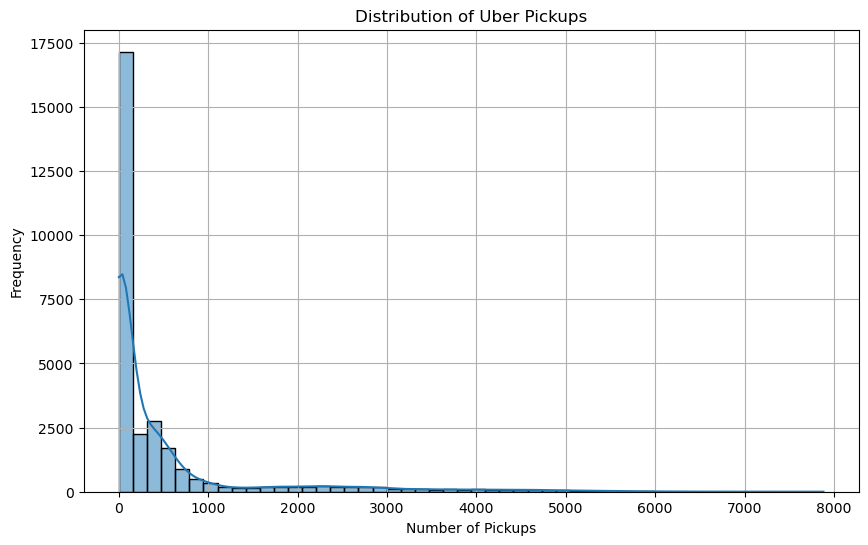

In [17]:
# Distribution of 'pickups' (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['pickups'], kde=True, bins=50)
plt.title('Distribution of Uber Pickups')
plt.xlabel('Number of Pickups')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


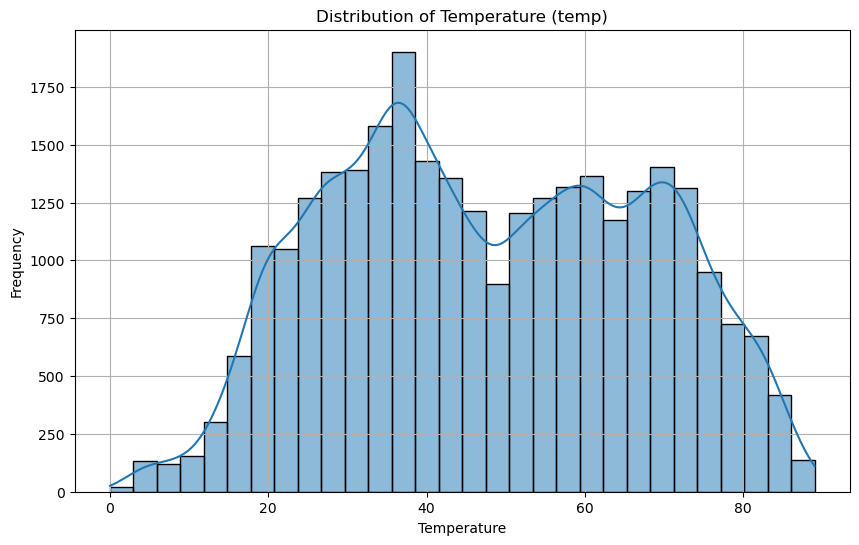

In [18]:
# Distribution of 'temp'
plt.figure(figsize=(10, 6))
sns.histplot(df['temp'], kde=True, bins=30)
plt.title('Distribution of Temperature (temp)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

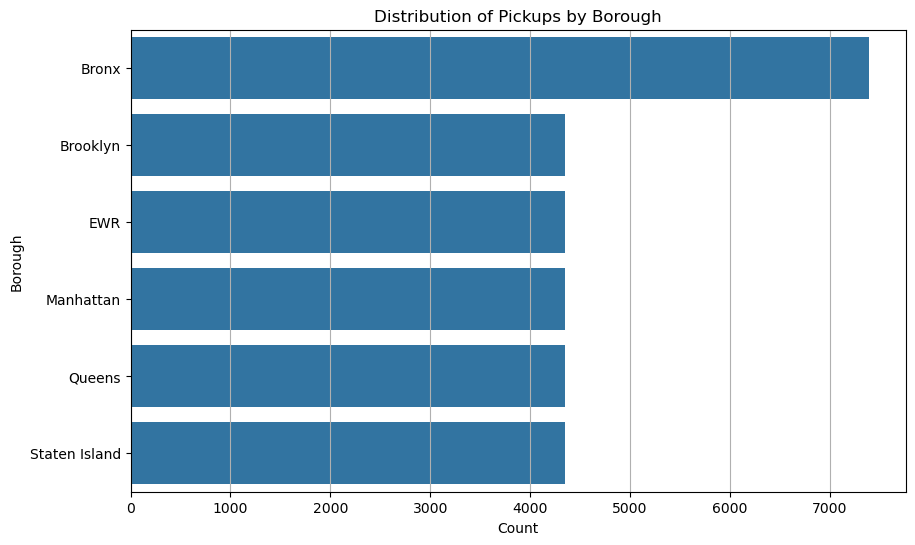

In [19]:
# Distribution of 'borough'
plt.figure(figsize=(10, 6))
sns.countplot(y=df['borough'], order=df['borough'].value_counts().index)
plt.title('Distribution of Pickups by Borough')
plt.xlabel('Count')
plt.ylabel('Borough')
plt.grid(axis='x')
plt.show()

# BIVARIATE ANALYSIS

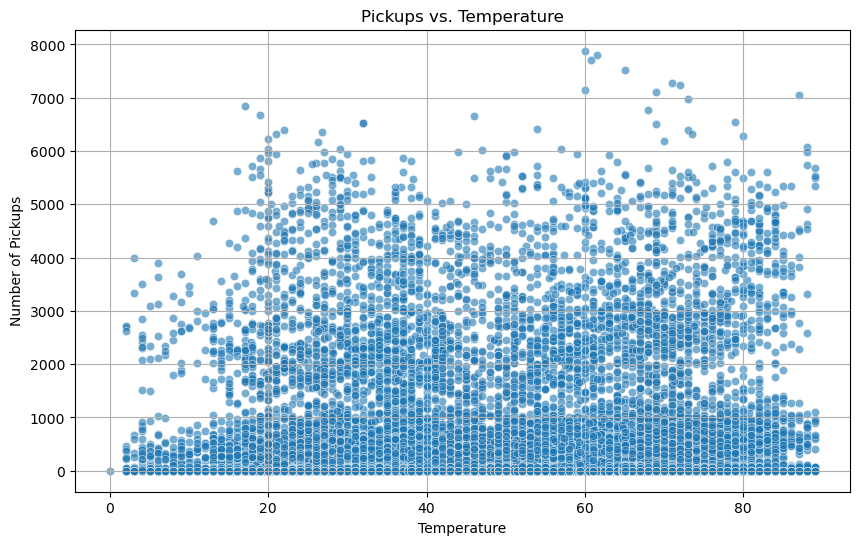

In [20]:
# Relationship between 'pickups' and 'temp'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='pickups', data=df, alpha=0.6)
plt.title('Pickups vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

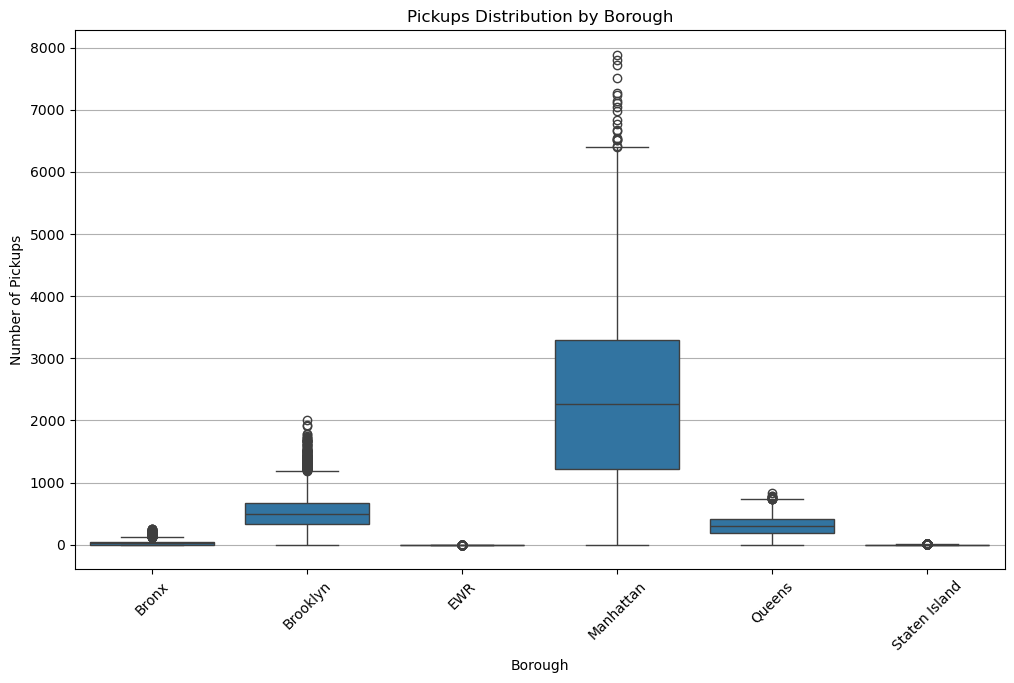

In [21]:
# Relationship between 'pickups' and 'borough'
plt.figure(figsize=(12, 7))
sns.boxplot(x='borough', y='pickups', data=df)
plt.title('Pickups Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

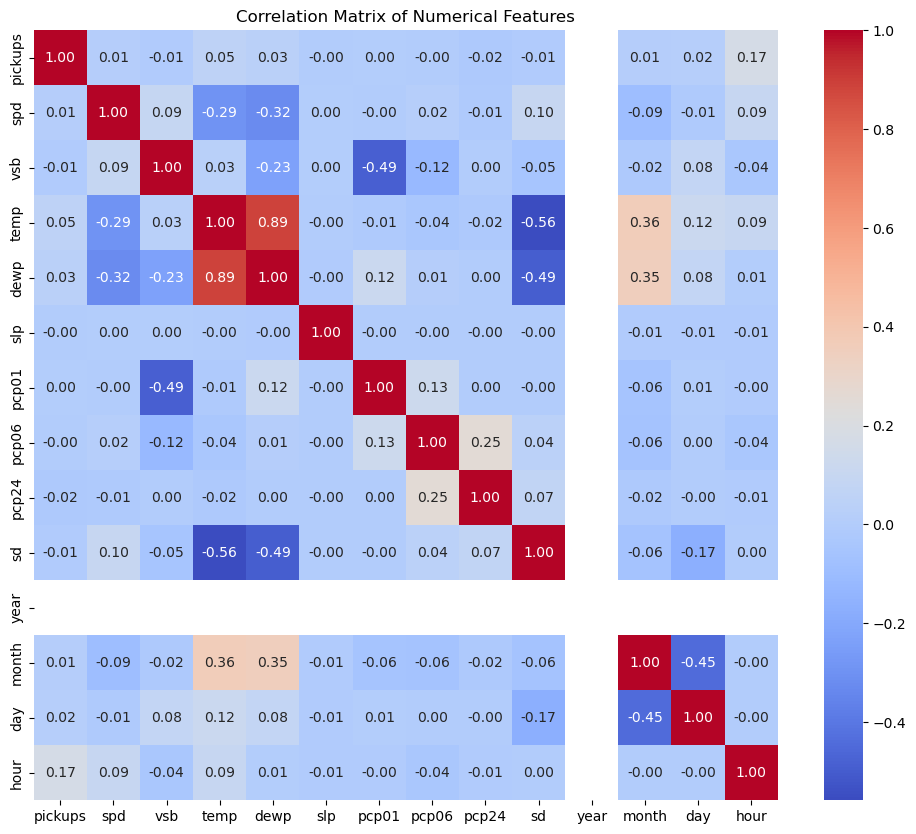

In [22]:
# Correlation matrix for numerical features
numerical_features_for_corr = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

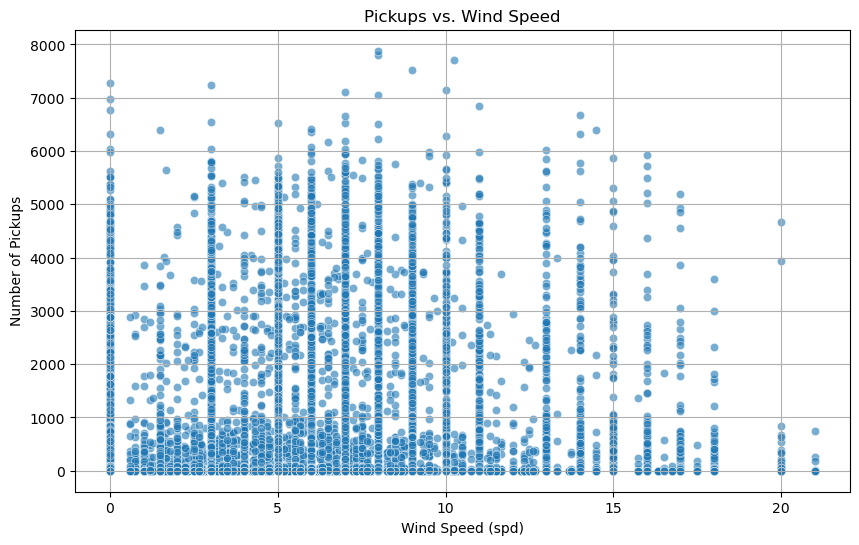

In [23]:
#Pickups vs. Wind Speed (spd)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spd', y='pickups', data=df, alpha=0.6)
plt.title('Pickups vs. Wind Speed')
plt.xlabel('Wind Speed (spd)')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

OUTLIER ANALYSIS

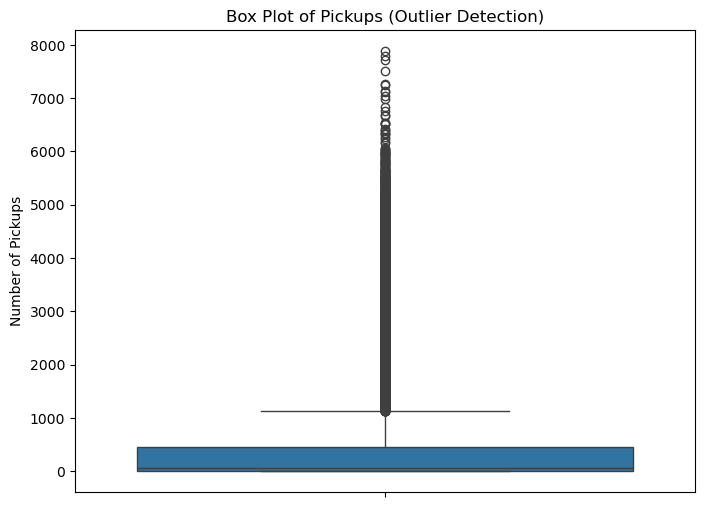

In [24]:
# Box plot for 'pickups' to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['pickups'])
plt.title('Box Plot of Pickups (Outlier Detection)')
plt.ylabel('Number of Pickups')
plt.show()

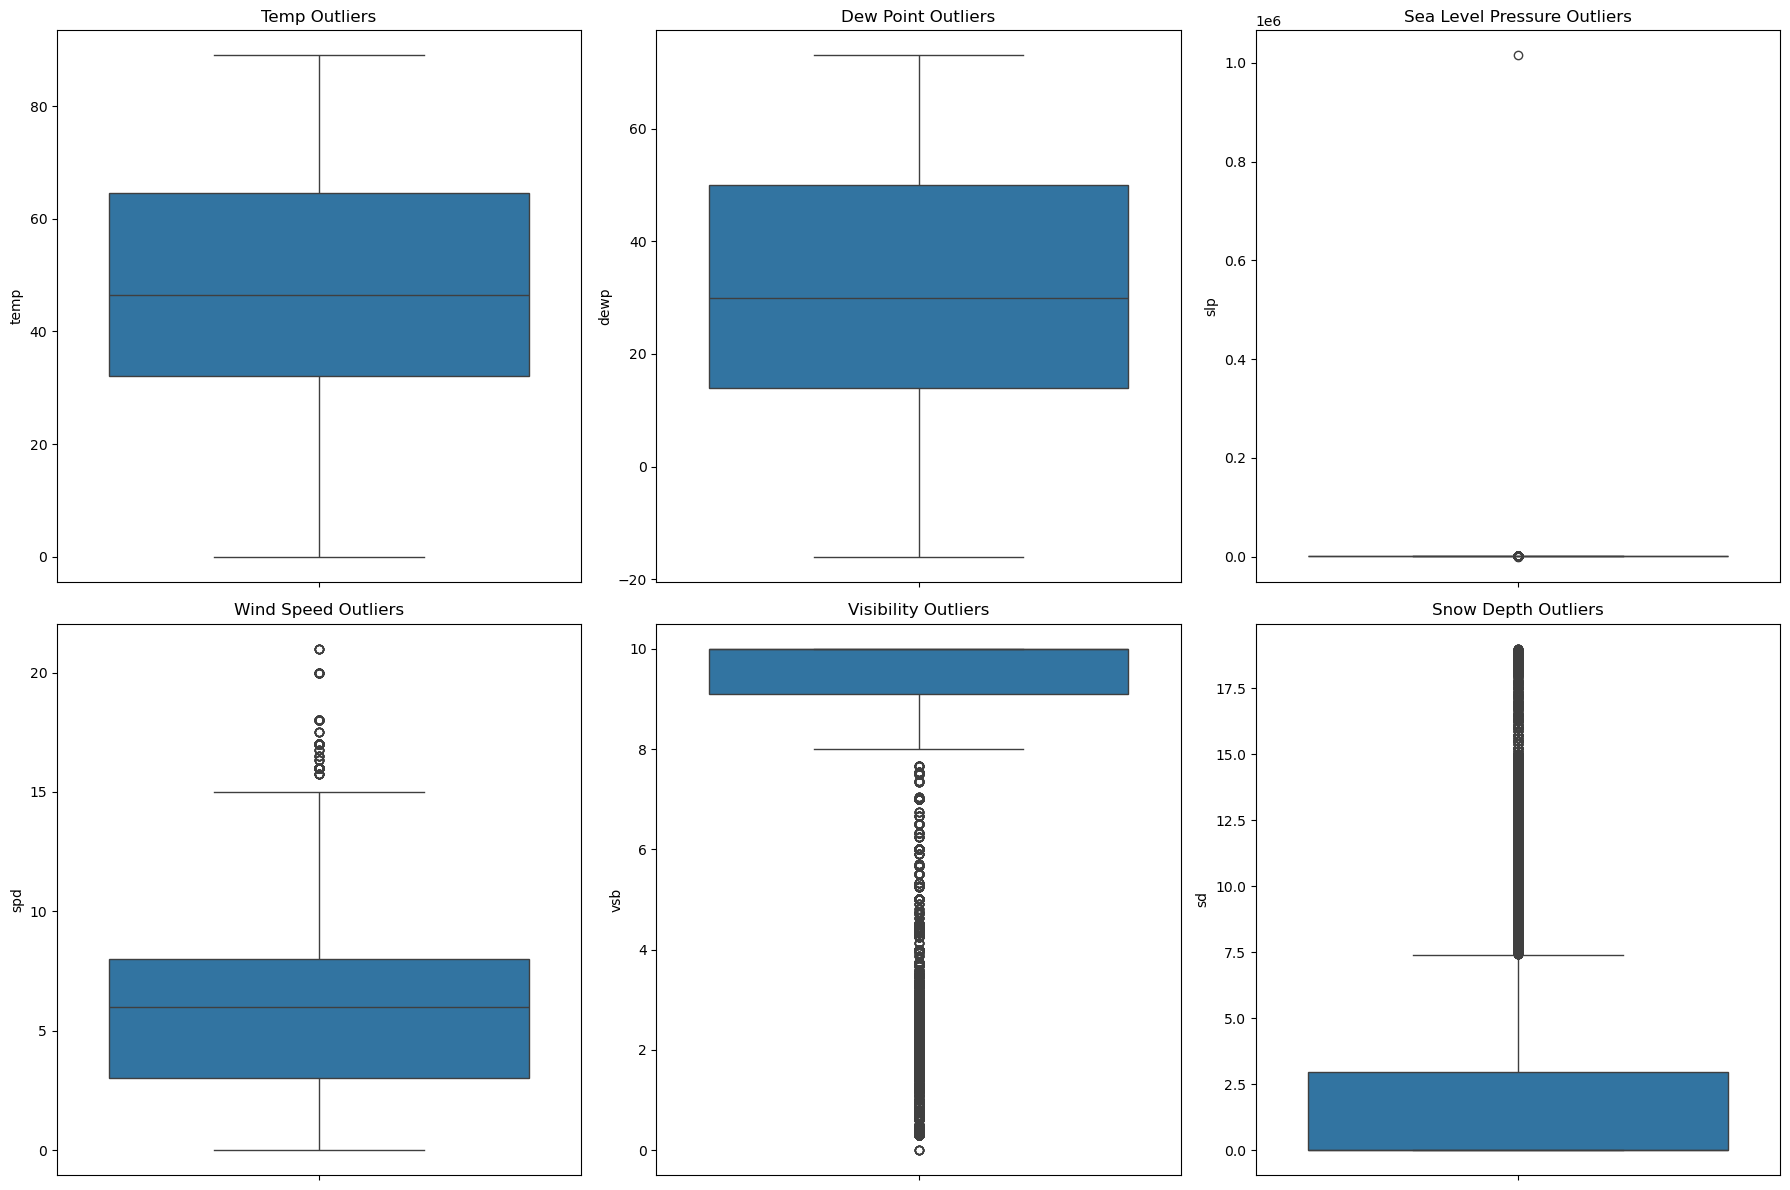

In [25]:
# Box plots for other key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.boxplot(y=df['temp'], ax=axes[0, 0]).set_title('Temp Outliers')
sns.boxplot(y=df['dewp'], ax=axes[0, 1]).set_title('Dew Point Outliers')
sns.boxplot(y=df['slp'], ax=axes[0, 2]).set_title('Sea Level Pressure Outliers')
sns.boxplot(y=df['spd'], ax=axes[1, 0]).set_title('Wind Speed Outliers')
sns.boxplot(y=df['vsb'], ax=axes[1, 1]).set_title('Visibility Outliers')
sns.boxplot(y=df['sd'], ax=axes[1, 2]).set_title('Snow Depth Outliers')
plt.tight_layout()
plt.show()

# OUTLIER TREATMENT

In [30]:
outlier_cols = ['pickups', 'temp', 'dewp', 'slp', 'spd', 'vsb', 'pcp01', 'pcp06', 'pcp24', 'sd']

In [31]:
for col in outlier_cols:
    if col in df.columns: # Check if column exists
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        # Apply capping
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"Capped outliers in '{col}' at 1st percentile ({lower_bound:.2f}) and 99th percentile ({upper_bound:.2f}).")
    else:
        print(f"Column '{col}' not found for outlier treatment.")

Capped outliers in 'pickups' at 1st percentile (0.00) and 99th percentile (4793.00).
Capped outliers in 'temp' at 1st percentile (9.00) and 99th percentile (85.00).
Capped outliers in 'dewp' at 1st percentile (-11.00) and 99th percentile (68.50).
Capped outliers in 'slp' at 1st percentile (1000.70) and 99th percentile (1037.30).
Capped outliers in 'spd' at 1st percentile (0.00) and 99th percentile (16.00).
Capped outliers in 'vsb' at 1st percentile (0.70) and 99th percentile (10.00).
Capped outliers in 'pcp01' at 1st percentile (0.00) and 99th percentile (0.09).
Capped outliers in 'pcp06' at 1st percentile (0.00) and 99th percentile (0.43).
Capped outliers in 'pcp24' at 1st percentile (0.00) and 99th percentile (1.09).
Capped outliers in 'sd' at 1st percentile (0.00) and 99th percentile (17.00).


# FEATURE ENGEENERING

In [27]:
df['day_of_week'] = df['pickup_dt_converted'].dt.dayofweek

In [28]:
#dropping original pickup_dt_converted
df = df.drop(['pickup_dt', 'pickup_dt_converted'], axis=1)

In [32]:
print(df.head())

     borough  pickups  spd   vsb  temp  dewp     slp  pcp01  pcp06  pcp24  \
0      Bronx    152.0  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   
1   Brooklyn   1519.0  5.0  10.0  46.5   7.0  1023.5    0.0    0.0    0.0   
2        EWR      0.0  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   
3  Manhattan   4793.0  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   
4     Queens    405.0  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   

    sd hday  year  month  day  hour  day_of_week  
0  0.0    Y  2015      1    1     1            3  
1  0.0    N  2015      1    1     1            3  
2  0.0    Y  2015      1    1     1            3  
3  0.0    Y  2015      1    1     1            3  
4  0.0    Y  2015      1    1     1            3  


In [33]:
df.sample(20)

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,year,month,day,hour,day_of_week
2556,Brooklyn,285.0,9.0,10.00,20.0,1.0,1023.6,0.000,0.000000,0.000000,0.000000,N,2015,1,17,4,5
18331,Bronx,119.0,5.0,10.00,60.0,20.0,1005.5,0.000,0.062000,0.000000,0.000000,N,2015,4,25,22,5
14108,Manhattan,1705.0,4.5,3.70,36.4,24.2,1013.6,0.000,0.235833,0.000000,0.000000,N,2015,3,30,11,0
19927,Staten Island,0.0,0.0,10.00,84.0,53.0,1021.5,0.000,0.000000,0.000000,0.000000,N,2015,5,5,19,1
15934,Staten Island,1.0,7.0,7.00,56.0,50.0,1008.2,0.000,0.000000,0.010000,0.000000,N,2015,11,4,0,2
25383,Bronx,37.0,0.0,10.00,64.0,53.0,1018.9,0.000,0.140000,0.000000,0.000000,N,2015,8,6,6,3
1122,Staten Island,0.0,14.0,10.00,11.0,-11.0,1023.6,0.000,0.000000,0.000000,0.875000,N,2015,8,1,2,5
795,Manhattan,460.0,11.0,10.00,27.0,-3.0,1027.4,0.000,0.000000,0.000000,0.000000,N,2015,6,1,1,0
13937,Queens,175.0,5.0,10.00,26.0,8.0,1021.5,0.000,0.010000,0.000000,0.000000,N,2015,3,29,9,6
21789,Queens,165.0,0.0,1.30,64.5,62.0,1020.7,0.005,0.210000,0.000000,0.000000,N,2015,5,17,6,6


# **FEATURE SCALING AND ONE HOT ENCODING**
# We will use `StandardScaler` for numerical features and `OneHotEncoder` for categorical features.

In [37]:
#IMPORTANT
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [34]:
X = df.drop('pickups', axis=1)
y = df['pickups']

In [35]:
# Identify numerical and categorical columns based on updated dataframe
# Numerical features should now include 'year', 'month', 'day', 'hour', 'day_of_week'
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

In [36]:
print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'year', 'month', 'day', 'hour', 'day_of_week']
Categorical Features: ['borough', 'hday']


In [38]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' for unseen categories in test set


In [39]:
# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (23280, 16)
Shape of X_test: (5821, 16)
Shape of y_train: (23280,)
Shape of y_test: (5821,)


# **MODEL-BUILDING USING SCIKIT LEARN**

In [41]:
# Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])


In [42]:
# Training
print("Training the Linear Regression Model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

Training the Linear Regression Model...
Model training complete.


# **MODEL EVALUATION**

In [43]:
# Make predictions on the training set
y_train_pred = model_pipeline.predict(X_train)

In [44]:
# Evaluate training set performance
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

In [45]:
print("\n--- Training Set Evaluation ---")
print(f"R-squared (R2): {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")


--- Training Set Evaluation ---
R-squared (R2): 0.7280
Mean Absolute Error (MAE): 274.7884
Mean Squared Error (MSE): 251166.4156
Root Mean Squared Error (RMSE): 501.1651


NOW FOR TEST SET

In [46]:
# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)

In [47]:
# Evaluate test set performance
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

In [48]:
print("\n--- Test Set Evaluation ---")
print(f"R-squared (R2): {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")


--- Test Set Evaluation ---
R-squared (R2): 0.7159
Mean Absolute Error (MAE): 286.2840
Mean Squared Error (MSE): 273191.7116
Root Mean Squared Error (RMSE): 522.6774
